In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.datasets import load_boston

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [9]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [14]:
df.corr()['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


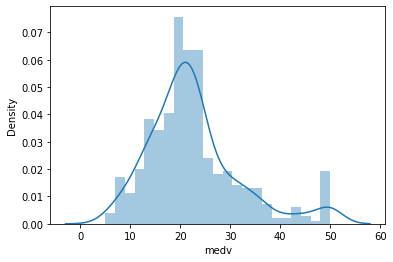

In [18]:
sns.distplot(df['medv']) #Kis range pe log lie krte hai ye dekh lete hai

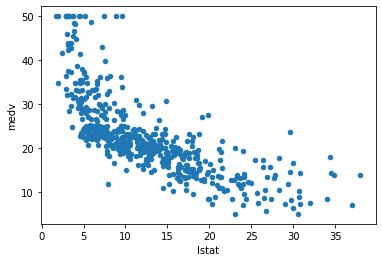

In [20]:
df.plot(kind = 'scatter',x='lstat',y='medv')

As Data is making little bit curve So,I need to make another Feature out of it,Can I do Something Like 1/x which is similar to data.

What's The Intuition Behind thinking of 1/x.

-> Like seeing the graph i analysed This feature is following 1/x trend but why to replace or making another column.

Main Idea is inorder to fir this data with Linear regression i need to add column specifying this rule so that my model can learn this.

In [23]:
X = df.drop(['medv'],axis=1)
Y=df['medv']

In Linear Regression We need to scale.

In [25]:
from sklearn.preprocessing import RobustScaler

X=RobustScaler().fit_transform(X)
lin=LinearRegression()
lin.fit(X,Y)

LinearRegression()

As No Categorical Data I just need to SCale EveryBody.
I'm Using Robust Scalar.


In [26]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lin,X,Y,cv=3,scoring='neg_mean_squared_error')


In [28]:
-scores['test_score']

array([ 20.63230588,  34.48294871, 451.90968255])

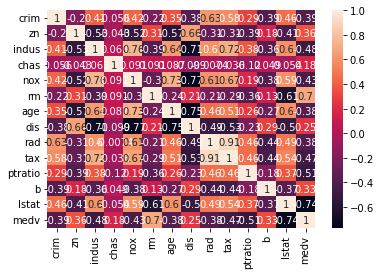

In [30]:
sns.heatmap(df.corr(),annot=True)

Lets drop All column which don't Have Thatmuch Co related.

In [32]:
df2=df[['lstat','ptratio','rm','medv']] #adding Inverse Thing

Let's Work On df2

In [33]:
X2= df2.drop(['medv'],axis=1)
Y2=df2['medv']

In [34]:
from sklearn.preprocessing import StandardScaler

X2=StandardScaler().fit_transform(X2)

lin.fit(X2,Y2)

LinearRegression()

In [35]:
scores = cross_validate(lin,X2,Y2,cv=3,scoring='neg_mean_squared_error') #cross Validation score on Lin i.e Linear regression
-scores['test_score']

array([15.48630243, 40.63589147, 83.18042076])

Lets see How Ridge and lasso regression doing.

In [40]:
from sklearn.linear_model import Ridge,Lasso 

rid=Ridge()
lasso=Lasso()
rid.fit(X2,Y2)
lasso.fit(X2,Y2)

Lasso()

In [42]:
-cross_validate(rid,X2,Y2,cv=3,scoring='neg_mean_squared_error')['test_score']

array([15.46399016, 40.66202745, 82.76134513])

One Conclusion Is that We can drop feature with less correlation.

Feature Engineering : Is important We need On what feature we need to train Our Model.